In [50]:
# import the important packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

In [51]:
# read the packages
df = pd.read_csv('NFLX.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-05-02,325.000000,326.070007,315.619995,317.549988,317.549988,4318600
1,2023-05-03,317.549988,324.619995,315.850006,319.299988,319.299988,5064100
2,2023-05-04,319.010010,323.609985,317.950012,320.779999,320.779999,3879700
3,2023-05-05,323.609985,324.149994,319.440002,322.760010,322.760010,3988600
4,2023-05-08,322.989990,332.559998,322.029999,331.209991,331.209991,5488600


In [52]:
df.shape

(252, 7)

in this this dataframe 253 rows and 7 columns

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       252 non-null    object 
 1   Open       252 non-null    float64
 2   High       252 non-null    float64
 3   Low        252 non-null    float64
 4   Close      252 non-null    float64
 5   Adj Close  252 non-null    float64
 6   Volume     252 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.9+ KB


In [54]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,470.119007,476.123174,464.385041,470.157342,470.157342,5.376840e+06
std,85.232755,85.665102,84.281683,85.110898,85.110898,3.701215e+06
min,317.549988,323.609985,315.619995,317.549988,317.549988,1.404700e+06
25%,411.855003,418.457496,407.092499,411.580001,411.580001,3.341200e+06
50%,444.729996,448.574997,439.175003,444.944992,444.944992,4.335350e+06
75%,553.085006,562.604996,549.095001,555.059982,555.059982,6.098900e+06
max,636.390015,639.000000,628.109985,636.179993,636.179993,2.807440e+07


# EDA

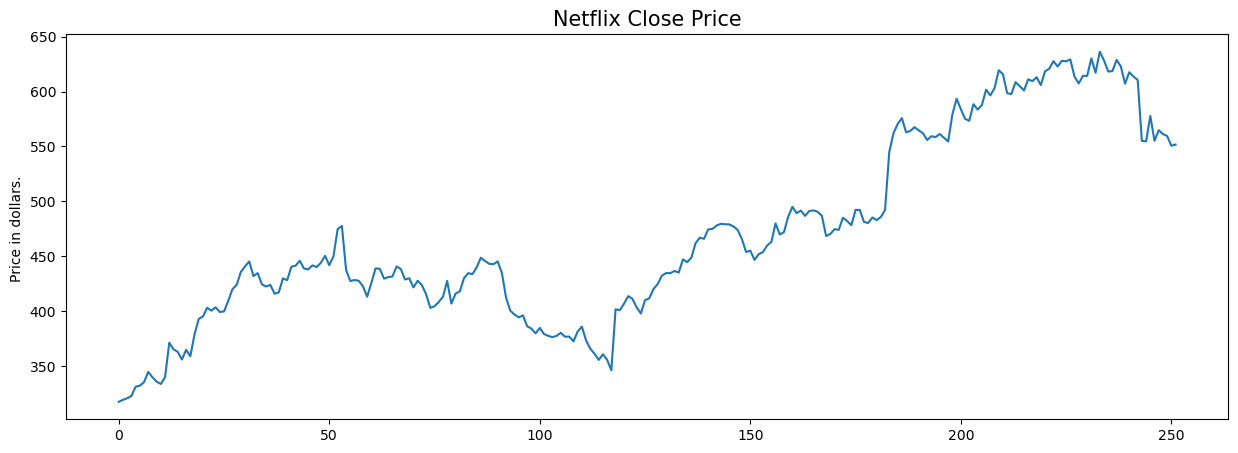

In [55]:
plt.figure(figsize=(15,5))
plt.plot(df['Close'])
plt.title('Netflix Close Price', fontsize = 15)
plt.ylabel('Price in dollars. ')
plt.show()

In [56]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-05-02,325.000000,326.070007,315.619995,317.549988,317.549988,4318600
1,2023-05-03,317.549988,324.619995,315.850006,319.299988,319.299988,5064100
2,2023-05-04,319.010010,323.609985,317.950012,320.779999,320.779999,3879700
3,2023-05-05,323.609985,324.149994,319.440002,322.760010,322.760010,3988600
4,2023-05-08,322.989990,332.559998,322.029999,331.209991,331.209991,5488600


- here Close columns and Adj Close columns is the same, check with each rows or not


In [57]:
df[df['Close'] == df['Adj Close']].shape

(252, 7)

- both the columns are same so we can remove on column

In [58]:
df = df.drop(['Adj Close'], axis = 1)

In [59]:
# check the null values
df.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

- there is no null values

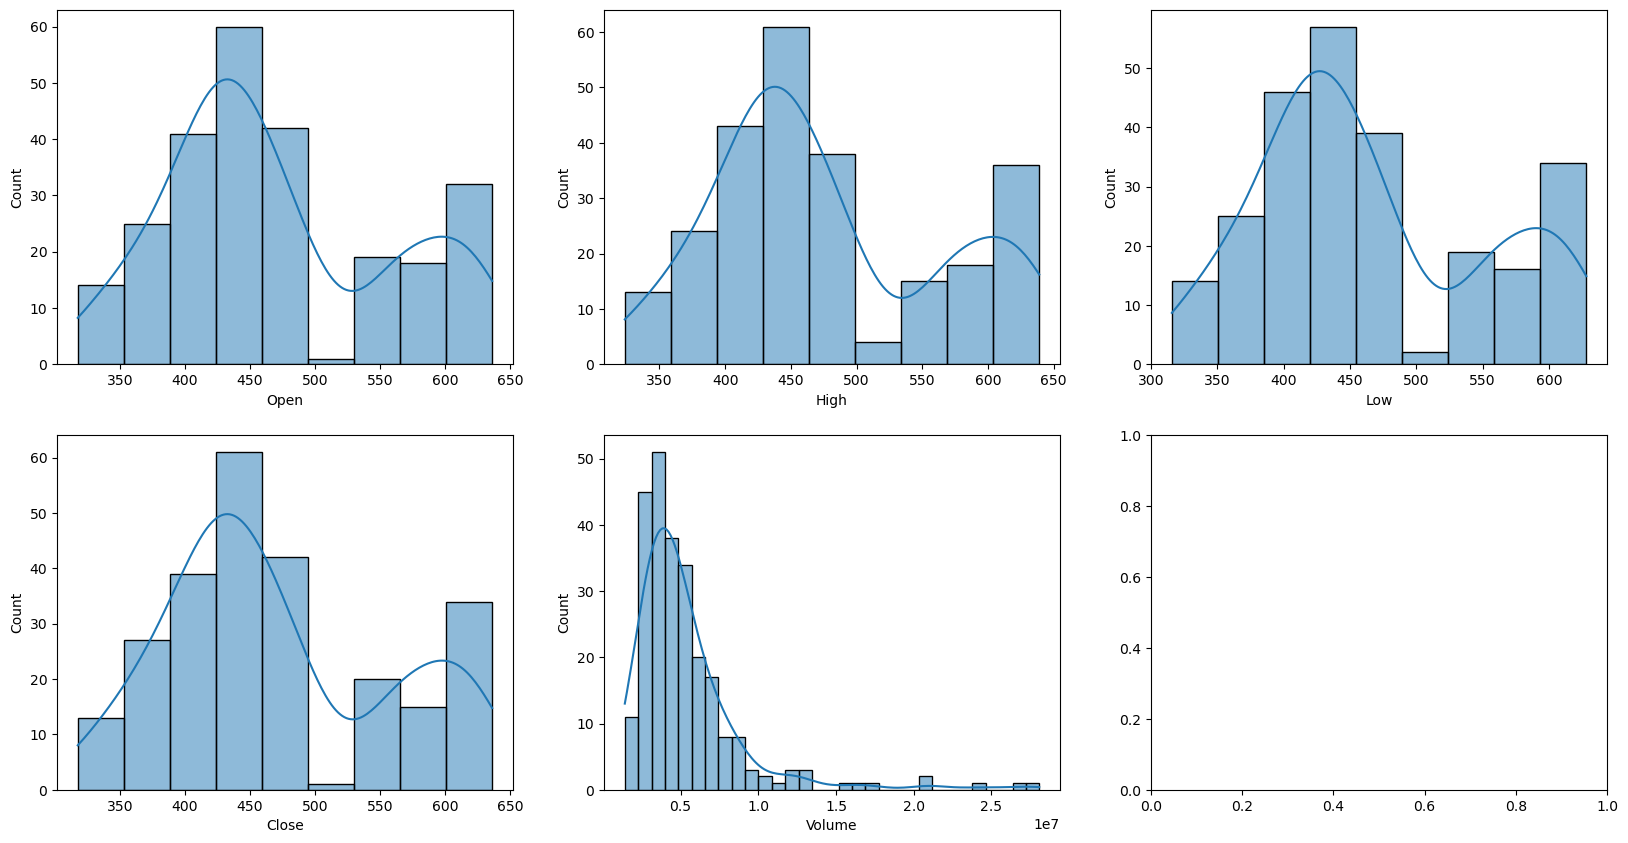

In [60]:
features = ['Open', 'High', 'Low', 'Close', 'Volume']
num_features = len(features)
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))

for i, col in enumerate(features):
    row_index = i // 3
    col_index = i % 3
    sns.histplot(df[col], kde=True, ax=axes[row_index, col_index])


# Adjusting the bottom margin of the last row
plt.subplots_adjust(bottom=0.1)

plt.show()


**outlier Analysis**

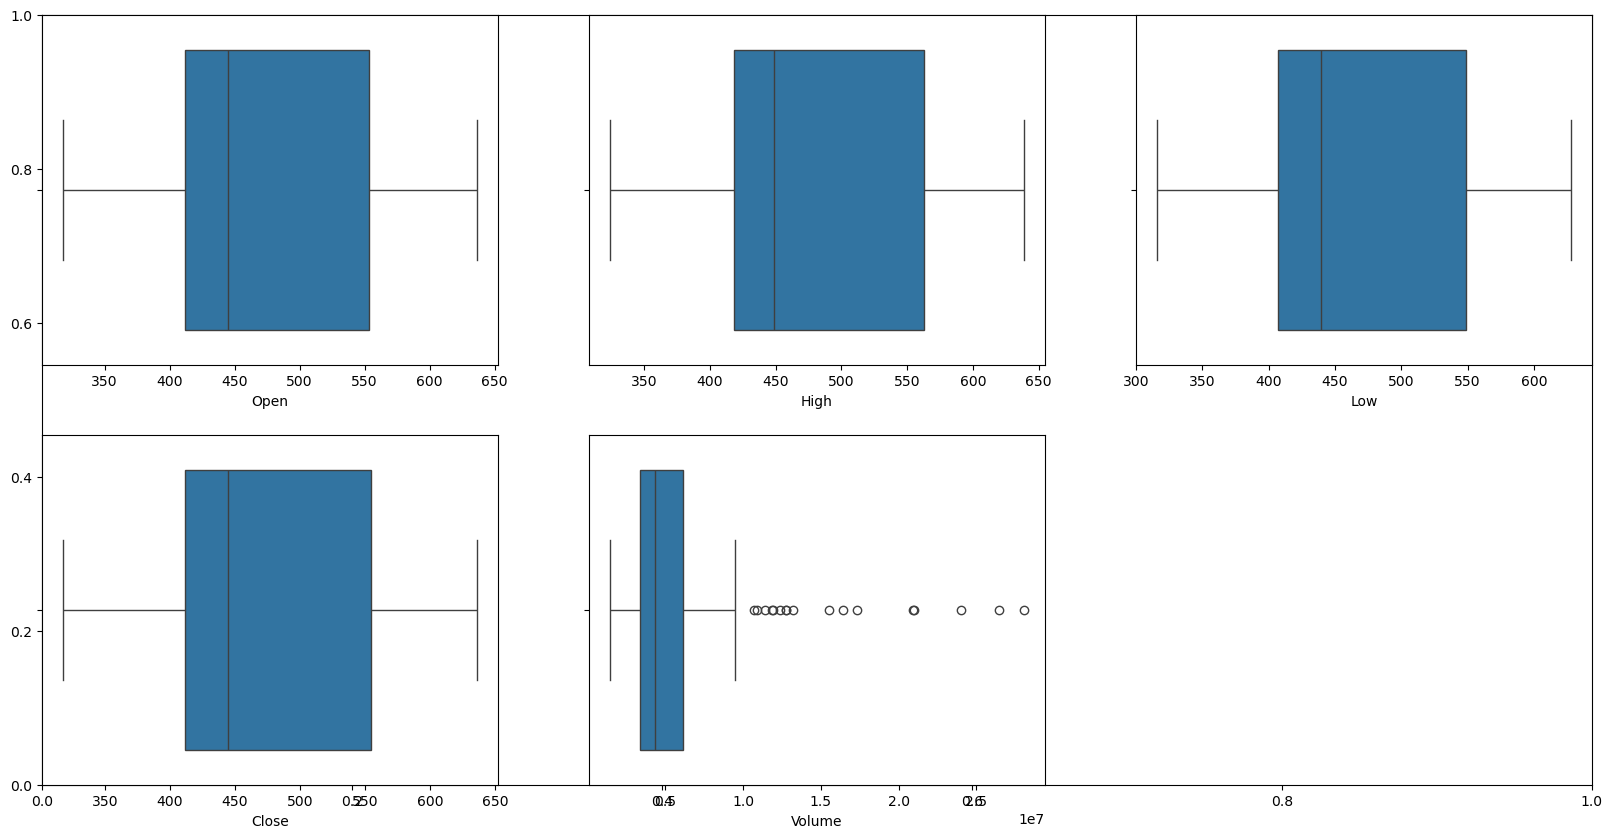

In [61]:
plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sns.boxplot(df[col], orient='h')
plt.show()

## Feature Engineering

In [62]:
# splitting the date into day month and year
splitted = df['Date'].str.split('-', expand = True)
df['day'] = splitted[2].astype('int')
df['month'] = splitted[1].astype('int')
df['year'] = splitted[0].astype('int')

df.drop('Date', axis = 1, inplace=True)
df.head()


,Open,High,Low,Close,Volume,day,month,year
0,325.000000,326.070007,315.619995,317.549988,4318600,2,5,2023
1,317.549988,324.619995,315.850006,319.299988,5064100,3,5,2023
2,319.010010,323.609985,317.950012,320.779999,3879700,4,5,2023
3,323.609985,324.149994,319.440002,322.760010,3988600,5,5,2023
4,322.989990,332.559998,322.029999,331.209991,5488600,8,5,2023


In [63]:
# A quarter is defined as a group of three months. Every company prepares its quarterly results and publishes them publicly so, that people can analyze the company’s performance


df['is_quarter_end'] = np.where(df['month']%3==0,1,0)

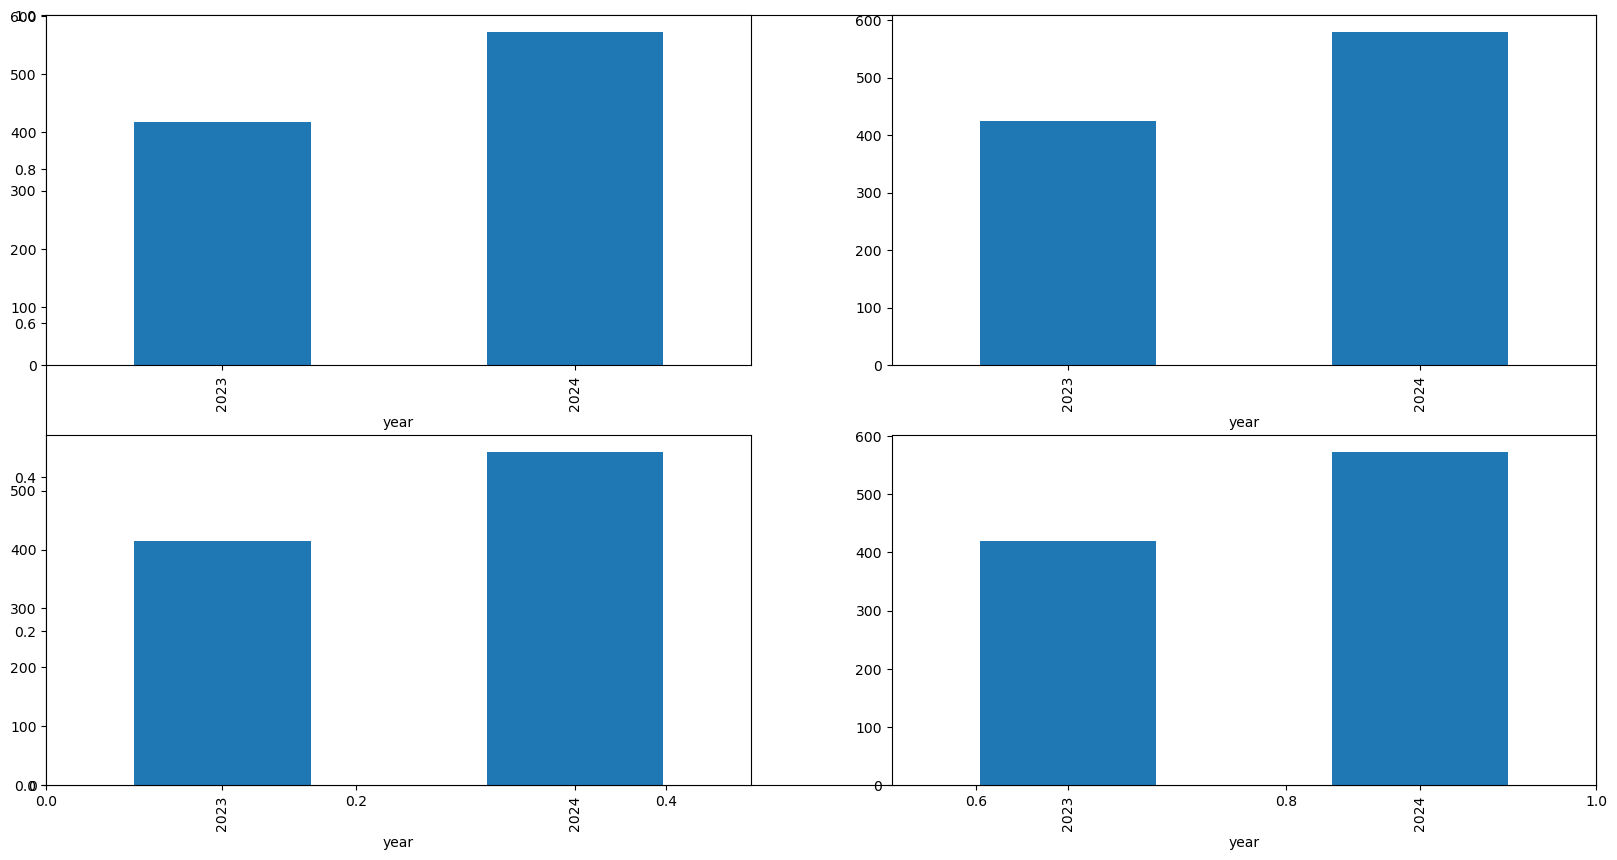

In [64]:
new_features = ['Open','High','Low','Close','Volume','day','month', 'year']
data_grouped = df.groupby('year')[new_features].mean()
plt.subplots(figsize = (20,10))

for i, col in enumerate(['Open', 'High','Low','Close']):
    plt.subplot(2,2,i+1)
    data_grouped[col].plot.bar()
plt.show()


In [65]:
df.groupby('is_quarter_end')[new_features].mean()

,Open,High,Low,Close,Volume,day,month,year
is_quarter_end,,,,,,,,
0,465.672806,471.906549,460.037252,466.206199,5.654400e+06,15.707602,6.046784,2023.374269
1,479.505433,485.024939,473.563706,478.498643,4.790881e+06,15.666667,7.481481,2023.246914


Here are some of the important observations of the above-grouped data:

- Prices are higher in the months which are quarter end as compared to that of the non-quarter end months.
- The volume of trades is lower in the months which are quarter end.

In [66]:
df['open-close'] = df['Open'] - df['Close']
df['low-high'] = df['Low'] - df['High']
df['target'] = np.where(df['Close'].shift(-1)> df['Close'], 1,0)

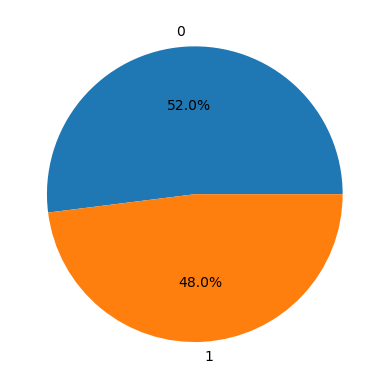

In [67]:
plt.pie(df['target'].value_counts().values, labels=[0,1], autopct='%1.1f%%')
plt.show()

<Axes: >

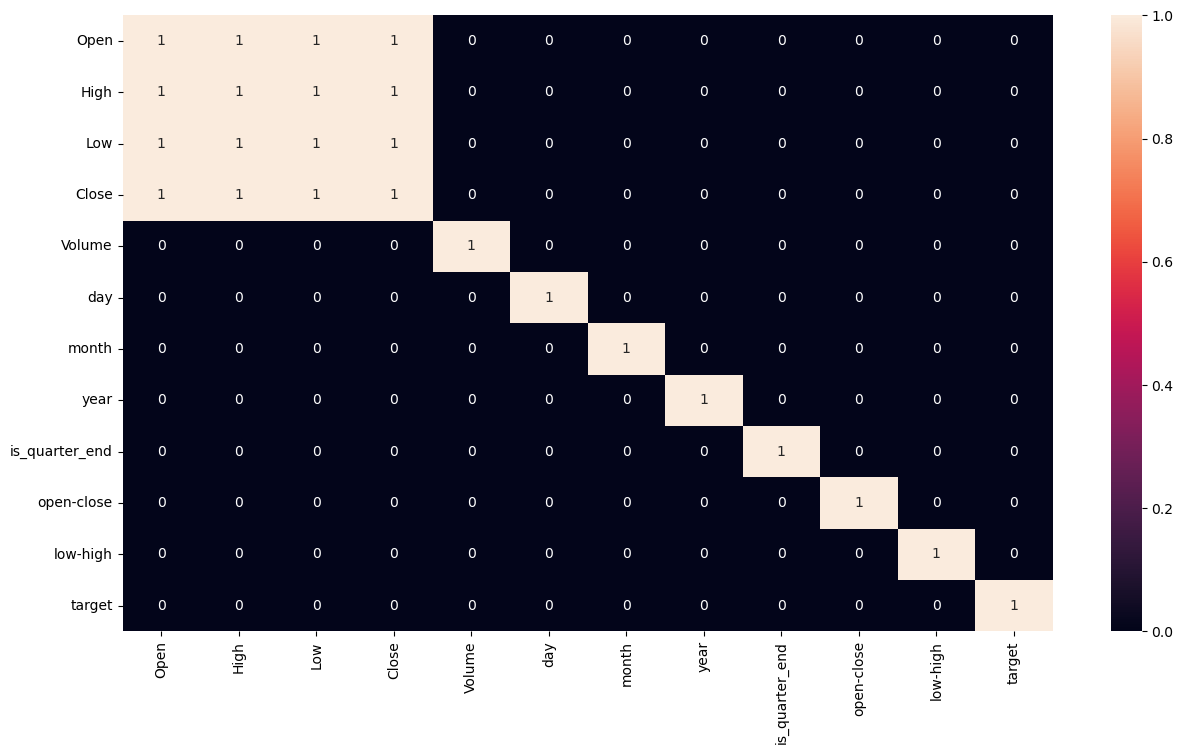

In [68]:
## check the highly correlated columns 
plt.figure(figsize=(15,8))
sns.heatmap(df.corr()>0.9, annot=True)

## Data Splitting and Normalization

In [80]:
features = df[['open-close', 'low-high','is_quarter_end']]
target  = df['target']
scaler = StandardScaler()
features = scaler.fit_transform(features)

array([[ 9.85854452e-01,  2.55421542e-01, -6.88247202e-01],
       [-2.25343858e-01,  5.88553208e-01, -6.88247202e-01],
       [-2.27975446e-01,  1.20523810e+00, -6.88247202e-01],
       [ 1.16947579e-01,  1.39360978e+00, -6.88247202e-01],
       [-1.07713126e+00,  2.39560925e-01, -6.88247202e-01],
       [-1.88481612e-01,  1.02280263e+00, -6.88247202e-01],
       [-2.26029538e-02,  8.20555218e-01, -6.88247202e-01],
       [-1.28250783e+00, -3.75139089e-01, -6.88247202e-01],
       [ 6.46190522e-01,  1.84033990e-01, -6.88247202e-01],
       [ 6.27757293e-01,  1.06643276e+00, -6.88247202e-01],
       [ 3.79597790e-02,  1.68112683e+00, -6.88247202e-01],
       [-1.07449559e+00, -4.33788680e-03, -6.88247202e-01],
       [-3.15986408e+00, -3.52199950e+00, -6.88247202e-01],
       [ 5.97480008e-01,  1.10212357e+00, -6.88247202e-01],
       [ 3.14425307e-01,  4.41814486e-01, -6.88247202e-01],
       [ 5.64567053e-01,  3.72412014e-01, -6.88247202e-01],
       [-1.03763729e+00,  2.41545807e-01

In [99]:
# split the data into x_train, X_test,y_train,y_test 
X_train,X_test, y_train,y_test = train_test_split(features, target, random_state=2022, test_size=0.2)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)


(201, 3) (51, 3)
(201,) (51,)


**Model Development and Evaluation**

In [100]:
models = [LogisticRegression(),SVC(kernel='poly', probability=True), XGBClassifier()]
,
for i in range(3):
    models[i].fit(X_train, y_train)

    print(f'{models[i]}:')
    print('Training Accuracy: ', metrics.roc_auc_score(y_train,models[i].predict_proba(X_train)[:,1]))
    print('Validation Accuracy: ', metrics.roc_auc_score(y_test, models[i].predict_proba(X_test)[:,1]))

    print()

LogisticRegression():
Training Accuracy:  0.5491559086395232
Validation Accuracy:  0.5261538461538462

SVC(kernel='poly', probability=True):
Training Accuracy:  0.41449851042701097
Validation Accuracy:  0.3984615384615385

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...):
Training Accuracy:

- here XGBClassifier is an overfit model

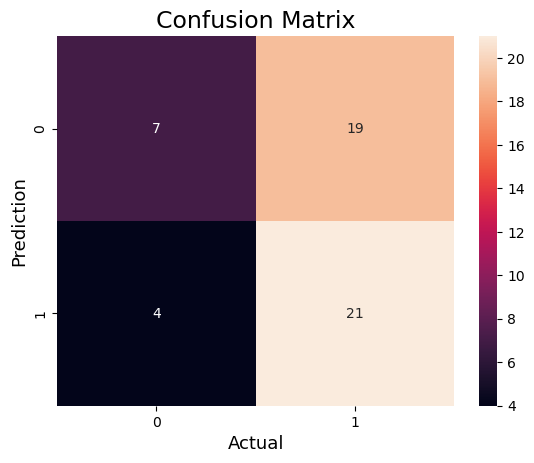

In [111]:
## create confusion matrix
cm = metrics.confusion_matrix(y_test, models[0].predict(X_test))
sns.heatmap(cm, 
            annot=True,
            fmt='g')
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [102]:
dir(metrics)

['ConfusionMatrixDisplay',
 'DetCurveDisplay',
 'DistanceMetric',
 'PrecisionRecallDisplay',
 'PredictionErrorDisplay',
 'RocCurveDisplay',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_base',
 '_classification',
 '_dist_metrics',
 '_pairwise_distances_reduction',
 '_pairwise_fast',
 '_plot',
 '_ranking',
 '_regression',
 '_scorer',
 'accuracy_score',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'auc',
 'average_precision_score',
 'balanced_accuracy_score',
 'brier_score_loss',
 'calinski_harabasz_score',
 'check_scoring',
 'class_likelihood_ratios',
 'classification_report',
 'cluster',
 'cohen_kappa_score',
 'completeness_score',
 'confusion_matrix',
 'consensus_score',
 'coverage_error',
 'd2_absolute_error_score',
 'd2_pinball_score',
 'd2_tweedie_score',
 'davies_bouldin_score',
 'dcg_score',
 'det_curve',
 'euclidean_distances',
 'explained_variance_score',
 'f1_score',
 'fb